In [82]:
import os
import gc
import pandas as pd
import numpy as np
from numpy import median
import statsmodels.api as sm
pd.set_option('display.max_columns', 500)

# ignore the warning message
import warnings
warnings.filterwarnings('ignore')


In [84]:
# visualize related
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
from IPython.display import display, HTML
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)


# ignore the warning message
import warnings
warnings.filterwarnings('ignore')

In [85]:
df = pd.read_excel("Amazing Mart Eu Data3.xlsx")

**Let's take a peep into what our data looks like**

df.head()

***Let's a peep into what our dataset looks like***

In [39]:
df.head()

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,Country,Region,Segment,Ship Mode,State,lon,lat
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,Sweden,North,Home Office,Economy Plus,Stockholm,18.068581,59.329324
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases,United Kingdom,North,Consumer,Economy,England,-3.010113,53.645708
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art,France,Central,Consumer,Economy,Auvergne-Rhône-Alpes,4.892360,44.933393
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art,United Kingdom,North,Corporate,Economy,England,-1.890401,52.486243
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage,France,Central,Home Office,Priority,Auvergne-Rhône-Alpes,5.718034,45.142151


In [6]:
df.head()

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,Country,Region,Segment,Ship Mode,State,lon,lat
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,Sweden,North,Home Office,Economy Plus,Stockholm,18.068581,59.329324
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases,United Kingdom,North,Consumer,Economy,England,-3.010113,53.645708
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art,France,Central,Consumer,Economy,Auvergne-Rhône-Alpes,4.892360,44.933393
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art,United Kingdom,North,Corporate,Economy,England,-1.890401,52.486243
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage,France,Central,Home Office,Priority,Auvergne-Rhône-Alpes,5.718034,45.142151


**Let's generate a summary statistics from our dataset**

In [7]:
df.describe()

,Discount,Sales,Profit,Quantity,lon,lat
count,8047.000000,8047.000000,8047.000000,8047.000000,4117.000000,4117.000000
mean,0.110047,291.845657,35.198211,3.772089,4.988737,48.565537
std,0.181773,485.212156,178.125844,2.203369,6.537205,5.089229
min,0.000000,3.000000,-3060.000000,1.000000,-9.224547,35.292277
25%,0.000000,48.000000,1.000000,2.000000,-0.376288,44.802614
50%,0.000000,117.000000,14.000000,3.000000,4.835659,49.006890
75%,0.100000,313.000000,47.000000,5.000000,9.744399,51.979074
max,0.850000,6517.000000,2476.000000,14.000000,26.945940,60.794533


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      8047 non-null   object 
 1   Product Name  8047 non-null   object 
 2   Discount      8047 non-null   float64
 3   Sales         8047 non-null   int64  
 4   Profit        8047 non-null   int64  
 5   Quantity      8047 non-null   int64  
 6   Category      8047 non-null   object 
 7   Sub-Category  8047 non-null   object 
 8   Country       4117 non-null   object 
 9   Region        4117 non-null   object 
 10  Segment       4117 non-null   object 
 11  Ship Mode     4117 non-null   object 
 12  State         4117 non-null   object 
 13  lon           4117 non-null   float64
 14  lat           4117 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 943.1+ KB


In [9]:
df.dtypes

Order ID         object
Product Name     object
Discount        float64
Sales             int64
Profit            int64
Quantity          int64
Category         object
Sub-Category     object
Country          object
Region           object
Segment          object
Ship Mode        object
State            object
lon             float64
lat             float64
dtype: object

**Let's do some exploratory analysis**

**Use the seaborn function to ascertain the level of correlation between the variable called Sales and Profit**

In [86]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

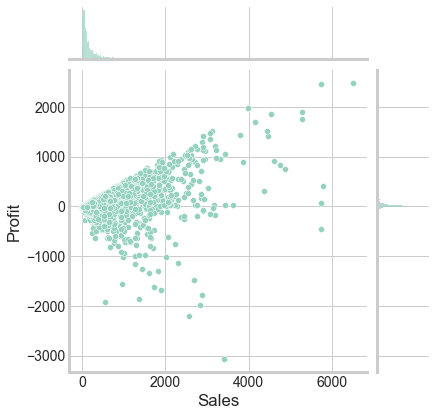

In [87]:
# More time on site, more money spent.
sns.jointplot(x='Sales',y='Profit',data=df)

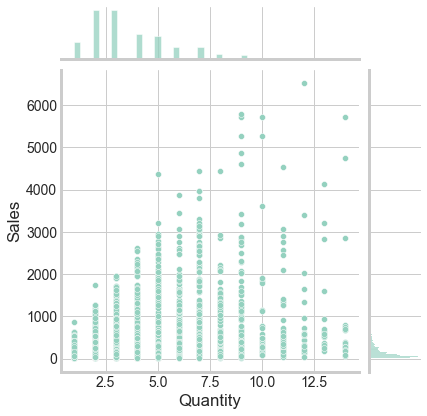

In [72]:
sns.jointplot(x='Quantity',y='Sales',data=df)

**Let's perform a Correlation Heatmap **

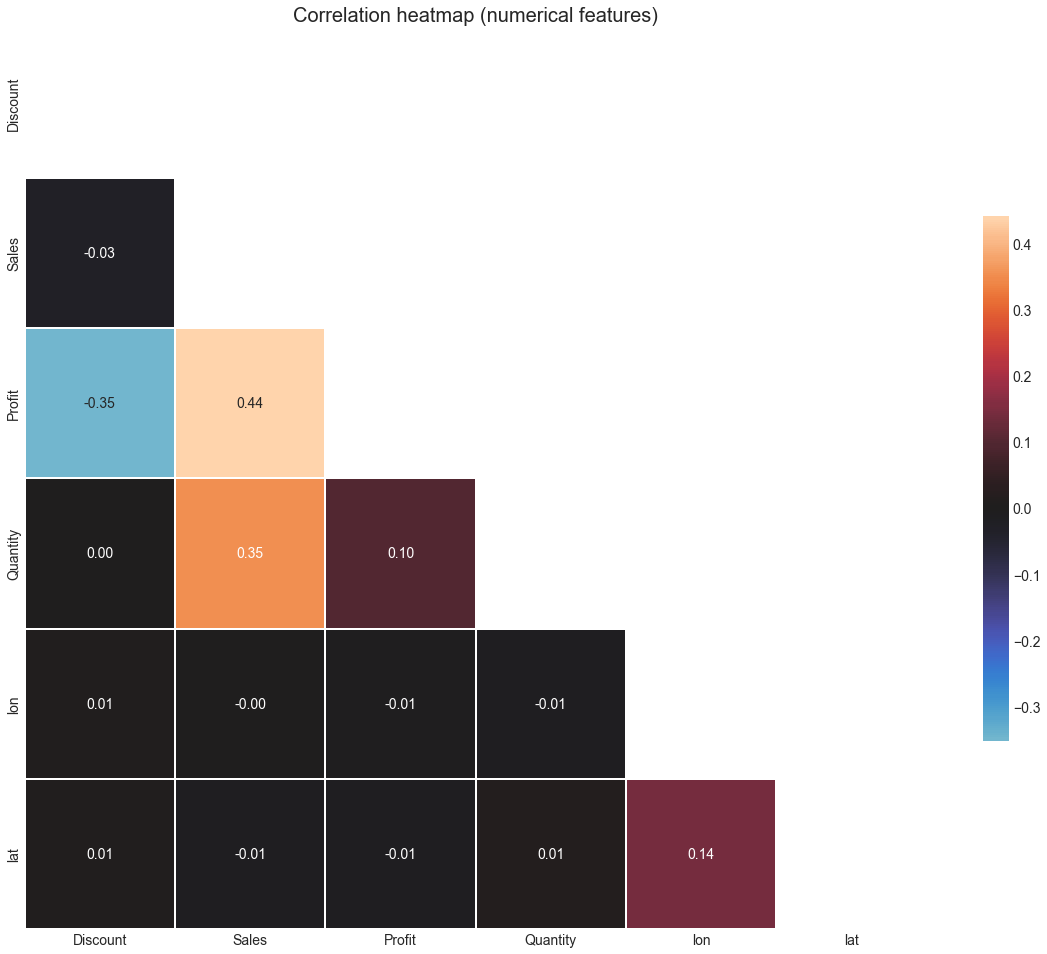

In [88]:
f,ax = plt.subplots(figsize=(18, 18))
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, linewidths=.1, fmt= '.2f',ax=ax,
            center=0, square=True, cbar_kws={'shrink': .5}
           )
plt.title('Correlation heatmap (numerical features)', size=20)
plt.show();

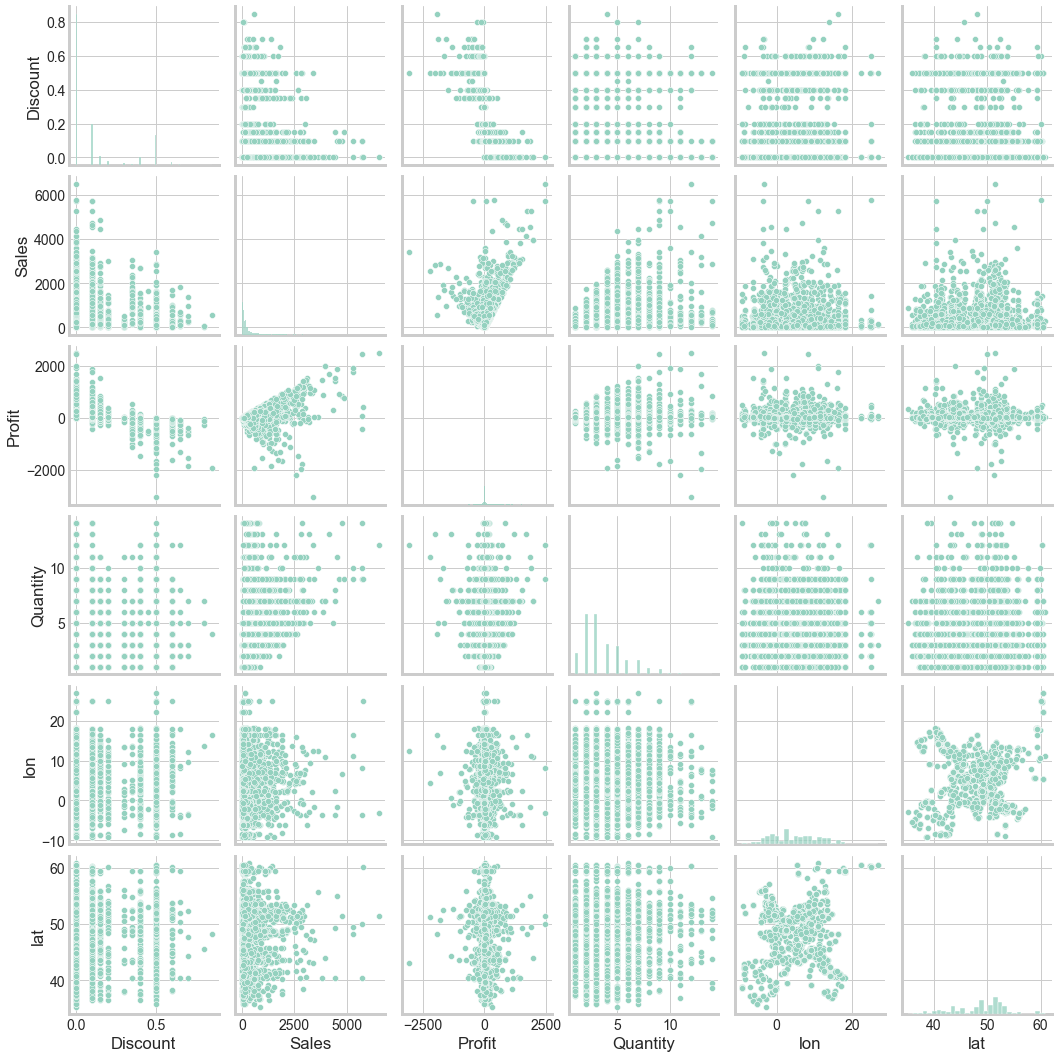

In [74]:
sns.pairplot(df)

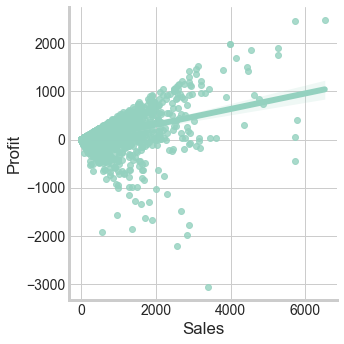

In [75]:
sns.lmplot(x='Sales',y='Profit',data=df)

In [78]:
y = df['Sales']

In [79]:
df.value_counts()

Order ID         Product Name                                     Discount  Sales  Profit  Quantity  Category         Sub-Category  Country  Region   Segment      Ship Mode     State                       lon         lat      
AZ-2011-1029887  Deflect-O Door Stop, Erganomic                   0.0       85      15     2         Furniture        Furnishings   Sweden   North    Corporate    Economy       Stockholm                    18.068581  59.329324    1
AZ-2013-3240279  Bush Floating Shelf Set, Traditional             0.1       154     14     1         Furniture        Bookcases     Austria  Central  Home Office  Priority      Vienna                       16.373819  48.208174    1
AZ-2013-3615405  Cardinal Hole Reinforcements, Recycled           0.0       17      7      3         Office Supplies  Binders       France   Central  Consumer     Economy       Provence-Alpes-Côte d'Azur   7.497540   43.774481    1
AZ-2013-3627184  Xerox Message Books, Recycled                    0.0       6

**Behold our Training and Testing Data!**

**Having explored our data, let's delve deeper into the aspect of predictive analytics**

In [91]:
X = df[['Sales']]

In [92]:
X = df[['Discount',  'Quantity']]

**Split the Data into Training and Test sets following the sklearn.model_selection standardized framework**

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Now it's time to train our model, import the LinearRegression high-performance Python library from sklearn**

In [95]:
from sklearn.linear_model import LinearRegression

**Create an instance of Linear Regression() model named lm**

In [96]:
lm = LinearRegression()

In [97]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the Coefficients for the model, a major metric for Regression analysis**

In [98]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-70.357448    80.95870879]


**Now that we have fit our model, let's evaluate its performance by predicting off its Test values**

In [99]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

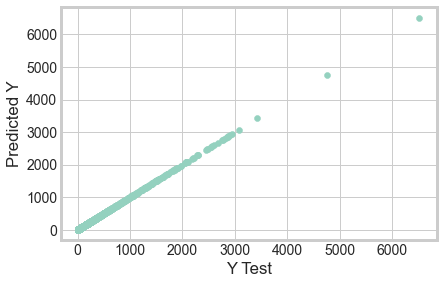

In [55]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

**Let's Evaluate the model by printing out the Mean Absolute Error,
Mean Squared Error and Root Mean Squared **

In [100]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 262.1812163903611
MSE: 177165.24952030223
RMSE: 420.9100254452277


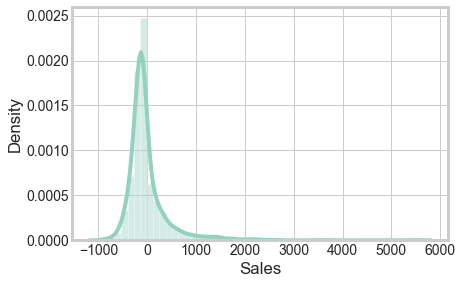

In [101]:
sns.distplot((y_test-predictions),bins=50);

In [102]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Discount,-70.357448
Quantity,80.958709


**How do you interprete this?**
**Interpreting the Coefficients:**

    
  **Holding all other features fixed, a one unit increase in Discount is associated 
with a decrease of -70.357448  total dollars in Sales , signifying a  significant loss for the company if effected**

**Holding all other features fixed, a one unit increase in Quantity is associated 
with an increase of 80.958709  total dollars in Sales, signifying a significant gain if effected by the company**
 

**Recommendations :**
    
   **It is recommended that the company should not go ahead with the idea of increasing the Discounts given to customers**
    **It is advised that the company should  go ahead with increasing the Quantity of goods produced, as there is a significant gain accumulated,
    thus, this plan is a very feasible one, and is highly recommended**
    
